In [1]:
# Required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.use('Agg')

In [2]:
# Training data
train_data = pd.read_pickle('train_processed.pkl')

0    615074
1        87
Name: Saving_Account, dtype: int64

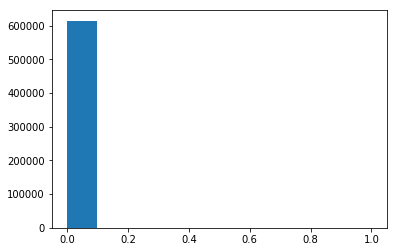

In [3]:
# Imbalance in Savings_Account
plt.hist(train_data['Saving_Account'])
train_data['Saving_Account'].value_counts()

### We can see that for this column the ratio of class 0 labels to class 1 labels is more than 10:1, therefore the dataset for 'Savings Account' is unbalanced.

In [4]:
# The names of our features
features = ['Age', 'Customer_Seniority',
       'Household_Income', 'New_customer_index', 'Activity_Index_0.0',
       'Activity_Index_1.0', 'Customer_Relation_Type_Beginning_Month_A',
       'Customer_Relation_Type_Beginning_Month_I',
       'Customer_Relation_Type_Beginning_Month_N',
       'Customer_Relation_Type_Beginning_Month_P',
       'Customer_Relation_Type_Beginning_Month_R', 'Province_Name_ALAVA',
       'Province_Name_ALBACETE', 'Province_Name_ALICANTE',
       'Province_Name_ALMERIA', 'Province_Name_ASTURIAS',
       'Province_Name_AVILA', 'Province_Name_BADAJOZ',
       'Province_Name_BALEARS, ILLES', 'Province_Name_BARCELONA',
       'Province_Name_BIZKAIA', 'Province_Name_BURGOS',
       'Province_Name_CACERES', 'Province_Name_CADIZ',
       'Province_Name_CANTABRIA', 'Province_Name_CASTELLON',
       'Province_Name_CEUTA', 'Province_Name_CIUDAD REAL',
       'Province_Name_CORDOBA', 'Province_Name_CORUÑA, A',
       'Province_Name_CUENCA', 'Province_Name_GIPUZKOA',
       'Province_Name_GIRONA', 'Province_Name_GRANADA',
       'Province_Name_GUADALAJARA', 'Province_Name_HUELVA',
       'Province_Name_HUESCA', 'Province_Name_JAEN', 'Province_Name_LEON',
       'Province_Name_LERIDA', 'Province_Name_LUGO', 'Province_Name_MADRID',
       'Province_Name_MALAGA', 'Province_Name_MELILLA', 'Province_Name_MURCIA',
       'Province_Name_NAVARRA', 'Province_Name_OURENSE',
       'Province_Name_PALENCIA', 'Province_Name_PALMAS, LAS',
       'Province_Name_PONTEVEDRA', 'Province_Name_RIOJA, LA',
       'Province_Name_SALAMANCA', 'Province_Name_SANTA CRUZ DE TENERIFE',
       'Province_Name_SEGOVIA', 'Province_Name_SEVILLA', 'Province_Name_SORIA',
       'Province_Name_TARRAGONA', 'Province_Name_TERUEL',
       'Province_Name_TOLEDO', 'Province_Name_VALENCIA',
       'Province_Name_VALLADOLID', 'Province_Name_ZAMORA',
       'Province_Name_ZARAGOZA', 'Sex_H', 'Sex_V', 'Foreigner_Index_N',
       'Foreigner_Index_S', 'Residence_Index_N', 'Residence_Index_S',
       'Segmentation_01 - TOP', 'Segmentation_02 - PARTICULARES',
       'Segmentation_03 - UNIVERSITARIO']

In [5]:
# Oversampling to decrease imbalance in product columns for Saving Account
from imblearn.over_sampling import SMOTE

X = train_data[features]
y = train_data['Saving_Account']

sm = SMOTE()
X, y = sm.fit_sample(X, y)

1    615074
0    615074
dtype: int64

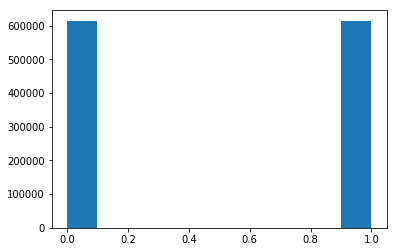

In [6]:
# Ratio of classes after over-sampling
plt.hist(y)
pd.Series(y).value_counts()

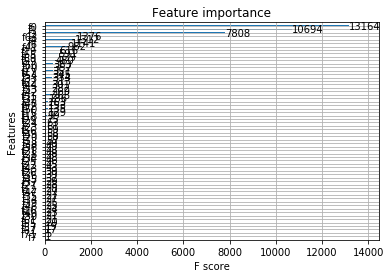

[[9.9993676e-01 6.3228777e-05]
 [9.9983358e-01 1.6641030e-04]
 [1.9365549e-04 9.9980634e-01]
 ...
 [3.0171871e-04 9.9969828e-01]
 [9.9993676e-01 6.3228777e-05]
 [2.2417307e-04 9.9977583e-01]]
Accuracy: 99.97%


In [7]:
# XGboost
#XGBoost model 1 for saving Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
from matplotlib import pyplot

# Training and testing datasplits
seed = 7
test_size = 0.33


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)

# Train the XGboost model

Accuracy=[]
model_saving = XGBClassifier(n_jobs=-1,max_depth=60,n_estimators=90)
model_saving.fit(X_train, y_train)
plot_importance(model_saving)
pyplot.show()
# Fit model using each importance as a threshold
from sklearn.feature_selection import SelectFromModel
from numpy import sort

predictions = model_saving.predict(X_test)
prediction_prob = model_saving.predict_proba(X_test)

# # Check the accuracy
print(prediction_prob)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [8]:
# Log loss for current Account
from sklearn.metrics import log_loss
log_loss(y_test,prediction_prob)

0.0014496041832417412

In [9]:
#Classification Report and confusion matrix - model 1 for saving Account

from sklearn.metrics import classification_report
print("classification_report:")
print(classification_report(y_test,predictions))



from sklearn.metrics import confusion_matrix
M=confusion_matrix(y_test,predictions)
print("Confusion matrix for model_1_xgboost:")
print(M)

classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202675
           1       1.00      1.00      1.00    203274

   micro avg       1.00      1.00      1.00    405949
   macro avg       1.00      1.00      1.00    405949
weighted avg       1.00      1.00      1.00    405949

Confusion matrix for model_1_xgboost:
[[202590     85]
 [    54 203220]]


In [8]:
# 2D clustering using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(X)
pca_output = pca.transform(X)

In [11]:
y[-10:]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

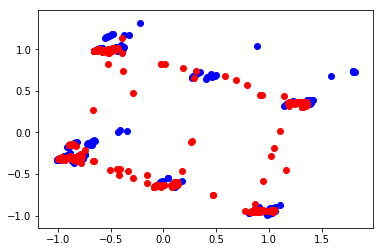

In [24]:
for i in range(300000,len(y),1000):
    if y[i]==0:
        plt.scatter(pca_output[i,0],pca_output[i,1],c='b')
    elif y[i]==1:
        plt.scatter(pca_output[i,0],pca_output[i,1],c='r')
plt.show()

In [8]:
# Oversampling to decrease imbalance in product columns for current Account
from imblearn.over_sampling import SMOTE

X_curr_acc = train_data[features]
y_curr_acc = train_data['Current_Account']

sm = SMOTE()
X_curr_acc,y_curr_acc = sm.fit_sample(X_curr_acc, y_curr_acc )

(965446, 72)

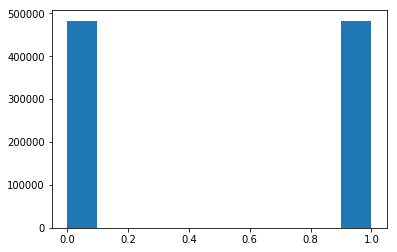

In [9]:
# Imbalance in current_Account
plt.hist(y_curr_acc)
X_curr_acc.shape

In [10]:
#XGBoost model 1 for current Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_curr_acc, X_test_curr_acc, y_train_curr_acc, y_test_curr_acc= train_test_split(X_curr_acc,y_curr_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_curr_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model_curr_acc.fit(X_train_curr_acc, y_train_curr_acc)
predictions_curr_acc = model_curr_acc.predict(X_test_curr_acc)
pred_prob_curr_acc = model_curr_acc.predict_proba(X_test_curr_acc)
print(pred_prob_curr_acc)
accuracy_curr_acc = accuracy_score(y_test_curr_acc, predictions_curr_acc)

print("Accuracy: %.2f%%" % (accuracy_curr_acc * 100.0))


[[0.12102139 0.8789786 ]
 [0.0011254  0.9988746 ]
 [0.9691359  0.03086413]
 ...
 [0.99537885 0.00462113]
 [0.7550037  0.24499628]
 [0.95045143 0.04954858]]
Accuracy: 84.30%


In [13]:
# Log loss for current Account
from sklearn.metrics import log_loss
log_loss(y_test_curr_acc,pred_prob_curr_acc)

0.317948664238445

In [14]:
#Classification Report and confusion matrix - model 1 for current Account

from sklearn.metrics import classification_report
print("classification_report for current_account:")
print(classification_report(y_test_curr_acc,predictions_curr_acc))



from sklearn.metrics import confusion_matrix
M_cu_ac=confusion_matrix(y_test_curr_acc,predictions_curr_acc)
print("Confusion matrix for model_xgboost_Curr_Acc:")
print(M_cu_ac)

classification_report for current_account:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84    159437
           1       0.83      0.86      0.85    159161

   micro avg       0.84      0.84      0.84    318598
   macro avg       0.84      0.84      0.84    318598
weighted avg       0.84      0.84      0.84    318598

Confusion matrix for model_xgboost_Curr_Acc:
[[132518  26919]
 [ 23009 136152]]


In [15]:
# Oversampling to decrease imbalance in product columns for Derivada Account
from imblearn.over_sampling import SMOTE

X_deri_acc = train_data[features]
y_deri_acc = train_data['Derivada_Account']

sm = SMOTE()
X_deri_acc,y_deri_acc = sm.fit_sample(X_deri_acc, y_deri_acc )

(1229728,)

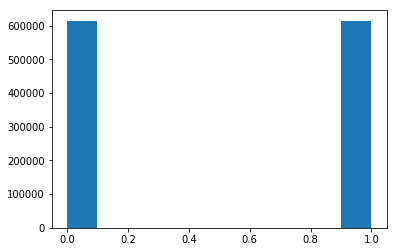

In [16]:
# Imbalance in derivada_Account
plt.hist(y_deri_acc)
y_deri_acc.shape

In [17]:
#XGBoost model 1 for derivada Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_deri_acc, X_test_deri_acc, y_train_deri_acc, y_test_deri_acc= train_test_split(X_deri_acc,y_deri_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_deri_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=50,n_estimators=60)
model_deri_acc.fit(X_train_deri_acc,  y_train_deri_acc)
predictions_deri_acc = model_deri_acc.predict(X_test_deri_acc)
pred_prob_deri_acc = model_deri_acc.predict_proba(X_test_deri_acc)

# Check the accuracy
accuracy_deri_acc = accuracy_score(y_test_deri_acc, predictions_deri_acc)
print("Accuracy: %.2f%%" % (accuracy_deri_acc * 100.0))

Accuracy: 99.31%


In [18]:
#Classification Report and confusion matrix - model 1 for derivada Account

from sklearn.metrics import classification_report
print("classification_report for derivada account:")
print(classification_report(y_test_deri_acc,predictions_deri_acc))



from sklearn.metrics import confusion_matrix
M_de_ac=confusion_matrix(y_test_deri_acc,predictions_deri_acc)
print("Confusion matrix for model_xgboost_deri_Acc:")
print(M_de_ac)

classification_report for derivada account:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    203034
           1       0.99      1.00      0.99    202777

   micro avg       0.99      0.99      0.99    405811
   macro avg       0.99      0.99      0.99    405811
weighted avg       0.99      0.99      0.99    405811

Confusion matrix for model_xgboost_deri_Acc:
[[200348   2686]
 [   124 202653]]


In [19]:
#log loss for derivada account

from sklearn.metrics import log_loss
log_loss(y_test_deri_acc,pred_prob_deri_acc)


0.049039265183585194

In [6]:
# Oversampling to decrease imbalance in product columns for payroll Account
from imblearn.over_sampling import SMOTE

X_Pay_acc = train_data[features]
y_Pay_acc = train_data['Payroll_Account']

sm = SMOTE()
X_pay_acc,y_pay_acc = sm.fit_sample(X_Pay_acc, y_Pay_acc )

(1113648,)

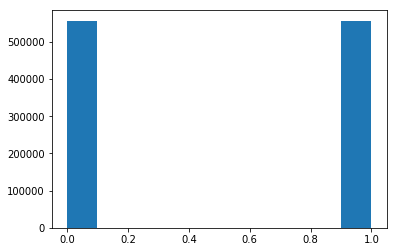

In [7]:
# Imbalance in payroll_Account
plt.hist(y_pay_acc)
y_pay_acc.shape

In [8]:
#XGBoost model 1 for payroll Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_pay_acc, X_test_pay_acc, y_train_pay_acc, y_test_pay_acc= train_test_split(X_pay_acc,y_pay_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_pay_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=75,n_estimators=70)
model_pay_acc.fit(X_train_pay_acc,  y_train_pay_acc)
predictions_pay_acc = model_pay_acc.predict(X_test_pay_acc)
pred_prob_pay_acc = model_pay_acc.predict_proba(X_test_pay_acc)

# Check the accuracy
accuracy_pay_acc = accuracy_score(y_test_pay_acc, predictions_pay_acc)
print("Accuracy: %.2f%%" % (accuracy_pay_acc * 100.0))

Accuracy: 92.03%


In [9]:
# Log loss for payroll account
from sklearn.metrics import log_loss
log_loss(y_test_pay_acc,pred_prob_pay_acc)

0.18861561602624496

In [10]:
#Classification Report and confusion matrix - model 1 for payroll Account

from sklearn.metrics import classification_report
print("classification_report for payroll account:")
print(classification_report(y_test_pay_acc,predictions_pay_acc))

from sklearn.metrics import confusion_matrix
M_pay_ac=confusion_matrix(y_test_pay_acc,predictions_pay_acc)
print("Confusion matrix for model_xgboost_pay_Acc:")
print(M_pay_ac)

classification_report for payroll account:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92    183767
           1       0.91      0.93      0.92    183737

   micro avg       0.92      0.92      0.92    367504
   macro avg       0.92      0.92      0.92    367504
weighted avg       0.92      0.92      0.92    367504

Confusion matrix for model_xgboost_pay_Acc:
[[167454  16313]
 [ 12989 170748]]


In [25]:
# Oversampling to decrease imbalance in product columns for Junior Account
from imblearn.over_sampling import SMOTE

X_juni_acc = train_data[features]
y_juni_acc = train_data['Junior_Account']

sm = SMOTE()
X_juni_acc,y_juni_acc = sm.fit_sample(X_juni_acc, y_juni_acc )

(1214908,)

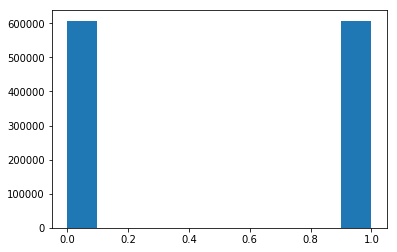

In [26]:
# Imbalance in Junior_Account
plt.hist(y_juni_acc)
y_juni_acc.shape

In [27]:
#XGBoost model 1 for junior Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_juni_acc, X_test_juni_acc, y_train_juni_acc, y_test_juni_acc= train_test_split(X_juni_acc,y_juni_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_juni_acc = XGBClassifier(n_jobs=-1)
model_juni_acc.fit(X_train_juni_acc, y_train_juni_acc)
predictions_juni_acc = model_juni_acc.predict(X_test_juni_acc)
pred_prob_juni_acc = model_juni_acc.predict_proba(X_test_juni_acc)

# Check the accuracy
accuracy_juni_acc = accuracy_score(y_test_juni_acc, predictions_juni_acc)
print("Accuracy: %.2f%%" % (accuracy_juni_acc * 100.0))

Accuracy: 99.63%


In [28]:
# Log loss for junior account
from sklearn.metrics import log_loss
log_loss(y_test_juni_acc,pred_prob_juni_acc)

0.007957217556154795

In [29]:
#Classification Report and confusion matrix - model 1 for junior Account

from sklearn.metrics import classification_report
print("classification_report for Junior account:")
print(classification_report(y_test_juni_acc,predictions_juni_acc))

from sklearn.metrics import confusion_matrix
M_juni_ac=confusion_matrix(y_test_juni_acc,predictions_juni_acc)
print("Confusion matrix for model_xgboost_juni_Acc:")
print(M_juni_ac)

classification_report for Junior account:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    200535
           1       0.99      1.00      1.00    200385

   micro avg       1.00      1.00      1.00    400920
   macro avg       1.00      1.00      1.00    400920
weighted avg       1.00      1.00      1.00    400920

Confusion matrix for model_xgboost_juni_Acc:
[[199177   1358]
 [   124 200261]]


In [30]:
# Oversampling to decrease imbalance in product columns for MAS_Particular Account
from imblearn.over_sampling import SMOTE

X_MPA_acc = train_data[features]
y_MPA_acc = train_data['MAS_Particular_Account']

sm = SMOTE()
X_MPA_acc,y_MPA_acc = sm.fit_sample(X_MPA_acc, y_MPA_acc )

(1213856,)

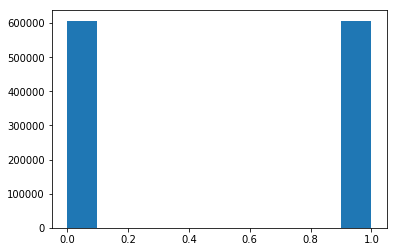

In [31]:
# Imbalance in MAS_Particular_Account
plt.hist(y_MPA_acc)
y_MPA_acc.shape

In [32]:
#XGBoost model 1 for MAS_Particular_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_MPA_acc, X_test_MPA_acc, y_train_MPA_acc, y_test_MPA_acc= train_test_split(X_MPA_acc,y_MPA_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_MPA_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_MPA_acc.fit(X_train_MPA_acc, y_train_MPA_acc)
predictions_MPA_acc = model_MPA_acc.predict(X_test_MPA_acc)
pred_prob_MPA_acc = model_MPA_acc.predict_proba(X_test_MPA_acc)

# Check the accuracy
accuracy_MPA_acc = accuracy_score(y_test_MPA_acc, predictions_MPA_acc)
print("Accuracy: %.2f%%" % (accuracy_MPA_acc * 100.0))

Accuracy: 98.86%


In [33]:
# Log loss for MAS_Particular_Account
from sklearn.metrics import log_loss
log_loss(y_test_MPA_acc,pred_prob_MPA_acc)

0.03324487578514519

In [34]:
#Classification Report and confusion matrix - model 1 for MAS_Particular_Account
from sklearn.metrics import classification_report
print("classification_report for MAS_Particular_Account:")
print(classification_report(y_test_MPA_acc,predictions_MPA_acc))

from sklearn.metrics import confusion_matrix
M_MPA_ac=confusion_matrix(y_test_MPA_acc,predictions_MPA_acc)
print("Confusion matrix for model_xgboost_MPA_Acc:")
print(M_MPA_ac)

classification_report for MAS_Particular_Account:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    200699
           1       0.98      0.99      0.99    199874

   micro avg       0.99      0.99      0.99    400573
   macro avg       0.99      0.99      0.99    400573
weighted avg       0.99      0.99      0.99    400573

Confusion matrix for model_xgboost_MPA_Acc:
[[197447   3252]
 [  1306 198568]]


In [37]:
# Oversampling to decrease imbalance in product columns for Particular Account
from imblearn.over_sampling import SMOTE

X_PA_acc = train_data[features]
y_PA_acc = train_data['Particular_Account']

sm = SMOTE()
X_PA_acc,y_PA_acc = sm.fit_sample(X_PA_acc, y_PA_acc )

(1021082,)

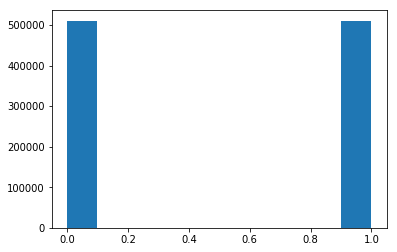

In [38]:
# Imbalance in Particular_Account
plt.hist(y_PA_acc)
y_PA_acc.shape

In [39]:
#XGBoost model 1 for Particular_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_PA_acc, X_test_PA_acc, y_train_PA_acc, y_test_PA_acc= train_test_split(X_PA_acc,y_PA_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_PA_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=80,n_estimators=70)
model_PA_acc.fit(X_train_PA_acc, y_train_PA_acc)
predictions_PA_acc = model_PA_acc.predict(X_test_PA_acc)
pred_prob_PA_acc = model_PA_acc.predict_proba(X_test_PA_acc)

# Check the accuracy
accuracy_PA_acc = accuracy_score(y_test_PA_acc, predictions_PA_acc)
print("Accuracy: %.2f%%" % (accuracy_PA_acc * 100.0))

Accuracy: 90.48%


In [40]:
# Log loss for Particular_Account
from sklearn.metrics import log_loss
log_loss(y_test_PA_acc,pred_prob_PA_acc)

0.20053574810696614

In [41]:
#Classification Report and confusion matrix - model 1 for Particular_Account
from sklearn.metrics import classification_report
print("classification_report for Particular_Account:")
print(classification_report(y_test_PA_acc,predictions_PA_acc))

from sklearn.metrics import confusion_matrix
M_PA_ac=confusion_matrix(y_test_PA_acc,predictions_PA_acc)
print("Confusion matrix for model_xgboost_PA_Acc:")
print(M_PA_ac)

classification_report for Particular_Account:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90    168257
           1       0.89      0.93      0.91    168701

   micro avg       0.90      0.90      0.90    336958
   macro avg       0.91      0.90      0.90    336958
weighted avg       0.91      0.90      0.90    336958

Confusion matrix for model_xgboost_PA_Acc:
[[148498  19759]
 [ 12321 156380]]


In [5]:
# Oversampling to decrease imbalance in product columns for Particular_Plus_Account
from imblearn.over_sampling import SMOTE

X_PPA_acc = train_data[features]
y_PPA_acc = train_data['Particular_Plus_Account']

sm = SMOTE()
X_PPA_acc,y_PPA_acc = sm.fit_sample(X_PPA_acc, y_PPA_acc )

(1158930,)

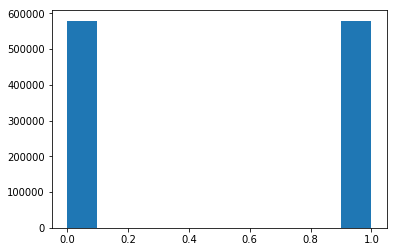

In [6]:
# Imbalance in Particular_Plus_Account
plt.hist(y_PPA_acc)
y_PPA_acc.shape

In [7]:
#XGBoost model 1 for Particular_Plus_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_PPA_acc, X_test_PPA_acc, y_train_PPA_acc, y_test_PPA_acc= train_test_split(X_PPA_acc,y_PPA_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_PPA_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=60)
model_PPA_acc.fit(X_train_PPA_acc, y_train_PPA_acc)
predictions_PPA_acc = model_PPA_acc.predict(X_test_PPA_acc)
pred_prob_PPA_acc = model_PPA_acc.predict_proba(X_test_PPA_acc)

# Check the accuracy
accuracy_PPA_acc = accuracy_score(y_test_PPA_acc, predictions_PPA_acc)
print("Accuracy: %.2f%%" % (accuracy_PPA_acc * 100.0))

Accuracy: 95.16%


In [8]:
# Log loss for Particular_Plus_Account
from sklearn.metrics import log_loss
log_loss(y_test_PPA_acc,pred_prob_PPA_acc)

0.12475322582095867

In [9]:
#Classification Report and confusion matrix - model 1 for Particular_Plus_Account
from sklearn.metrics import classification_report
print("classification_report for Particular_Plus_Account:")
print(classification_report(y_test_PPA_acc,predictions_PPA_acc))

from sklearn.metrics import confusion_matrix
M_PPA_ac=confusion_matrix(y_test_PPA_acc,predictions_PPA_acc)
print("Confusion matrix for model_xgboost_PPA_Acc:")
print(M_PPA_ac)

classification_report for Particular_Plus_Account:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    191205
           1       0.95      0.96      0.95    191242

   micro avg       0.95      0.95      0.95    382447
   macro avg       0.95      0.95      0.95    382447
weighted avg       0.95      0.95      0.95    382447

Confusion matrix for model_xgboost_PPA_Acc:
[[180673  10532]
 [  7981 183261]]


In [10]:
# Oversampling to decrease imbalance in product columns for Short_Term_Deposit
from imblearn.over_sampling import SMOTE

X_STD_acc = train_data[features]
y_STD_acc = train_data['Short_Term_Deposit']

sm = SMOTE()
X_STD_acc,y_STD_acc = sm.fit_sample(X_STD_acc, y_STD_acc )

(1227370,)

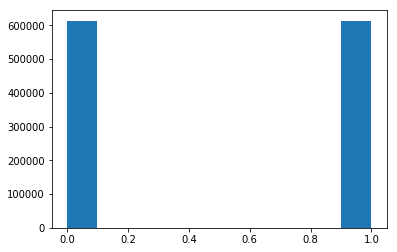

In [11]:
# Imbalance in Short_Term_Deposit
plt.hist(y_STD_acc)
y_STD_acc.shape

In [12]:
#XGBoost model 1 for Short_Term_Deposit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_STD_acc, X_test_STD_acc, y_train_STD_acc, y_test_STD_acc= train_test_split(X_STD_acc,y_STD_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_STD_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=70)
model_STD_acc.fit(X_train_STD_acc, y_train_STD_acc)
predictions_STD_acc = model_STD_acc.predict(X_test_STD_acc)
pred_prob_STD_acc = model_STD_acc.predict_proba(X_test_STD_acc)

# Check the accuracy
accuracy_STD_acc = accuracy_score(y_test_STD_acc, predictions_STD_acc)
print("Accuracy: %.2f%%" % (accuracy_STD_acc * 100.0))

Accuracy: 99.40%


In [13]:
# Log loss for Short_Term_Deposit
from sklearn.metrics import log_loss
log_loss(y_test_STD_acc,pred_prob_STD_acc)

0.022087517168907157

In [14]:
#Classification Report and confusion matrix - model 1 for Short_Term_Deposit
from sklearn.metrics import classification_report
print("classification_report for Short_Term_Deposit:")
print(classification_report(y_test_STD_acc,predictions_STD_acc))

from sklearn.metrics import confusion_matrix
M_STD_ac=confusion_matrix(y_test_STD_acc,predictions_STD_acc)
print("Confusion matrix for model_xgboost_STD_Acc:")
print(M_STD_ac)

classification_report for Short_Term_Deposit:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99    202731
           1       0.99      1.00      0.99    202302

   micro avg       0.99      0.99      0.99    405033
   macro avg       0.99      0.99      0.99    405033
weighted avg       0.99      0.99      0.99    405033

Confusion matrix for model_xgboost_STD_Acc:
[[200802   1929]
 [   481 201821]]


In [15]:
# Oversampling to decrease imbalance in product columns for Medium_Term_Deposit
from imblearn.over_sampling import SMOTE

X_MTD_acc = train_data[features]
y_MTD_acc = train_data['Medium_Term_Deposit']

sm = SMOTE()
X_MTD_acc,y_MTD_acc = sm.fit_sample(X_MTD_acc, y_MTD_acc )

(1227112,)

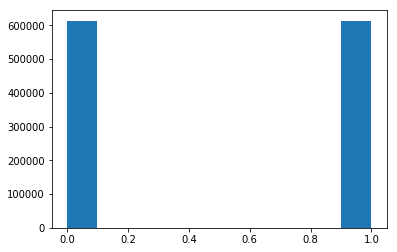

In [16]:
# Imbalance in Medium_Term_Deposit
plt.hist(y_MTD_acc)
y_MTD_acc.shape

In [17]:
#XGBoost model 1 for Medium_Term_Deposit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_MTD_acc, X_test_MTD_acc, y_train_MTD_acc, y_test_MTD_acc= train_test_split(X_MTD_acc,y_MTD_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_MTD_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_MTD_acc.fit(X_train_MTD_acc, y_train_MTD_acc)
predictions_MTD_acc = model_MTD_acc.predict(X_test_MTD_acc)
pred_prob_MTD_acc = model_MTD_acc.predict_proba(X_test_MTD_acc)

# Check the accuracy
accuracy_MTD_acc = accuracy_score(y_test_MTD_acc, predictions_MTD_acc)
print("Accuracy: %.2f%%" % (accuracy_MTD_acc * 100.0))

Accuracy: 99.64%


In [18]:
# Log loss for Medium_Term_Deposit
from sklearn.metrics import log_loss
log_loss(y_test_MTD_acc,pred_prob_MTD_acc)

0.016207236290647457

In [19]:
#Classification Report and confusion matrix - model 1 for Medium_Term_Deposit
from sklearn.metrics import classification_report
print("classification_report for Medium_Term_Deposit:")
print(classification_report(y_test_MTD_acc,predictions_MTD_acc))

from sklearn.metrics import confusion_matrix
M_MTD_ac=confusion_matrix(y_test_MTD_acc,predictions_MTD_acc)
print("Confusion matrix for model_xgboost_MTD_Acc:")
print(M_MTD_ac)

classification_report for Medium_Term_Deposit:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    202546
           1       1.00      1.00      1.00    202401

   micro avg       1.00      1.00      1.00    404947
   macro avg       1.00      1.00      1.00    404947
weighted avg       1.00      1.00      1.00    404947

Confusion matrix for model_xgboost_MTD_Acc:
[[201738    808]
 [   639 201762]]


In [20]:
# Oversampling to decrease imbalance in product columns for Long_Term_Deposit
from imblearn.over_sampling import SMOTE

X_LTD_acc = train_data[features]
y_LTD_acc = train_data['Long_Term_Deposit']

sm = SMOTE()
X_LTD_acc,y_LTD_acc = sm.fit_sample(X_LTD_acc, y_LTD_acc )

(1159214,)

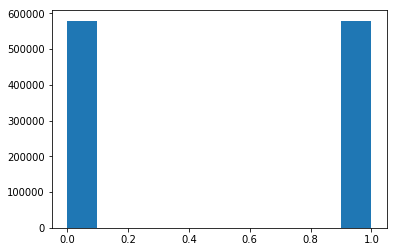

In [21]:
# Imbalance in Long_Term_Deposit
plt.hist(y_LTD_acc)
y_LTD_acc.shape

In [22]:
#XGBoost model 1 for Long_Term_Deposit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_LTD_acc, X_test_LTD_acc, y_train_LTD_acc, y_test_LTD_acc= train_test_split(X_LTD_acc,y_LTD_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_LTD_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=70)
model_LTD_acc.fit(X_train_LTD_acc, y_train_LTD_acc)
predictions_LTD_acc = model_LTD_acc.predict(X_test_LTD_acc)
pred_prob_LTD_acc = model_LTD_acc.predict_proba(X_test_LTD_acc)

# Check the accuracy
accuracy_LTD_acc = accuracy_score(y_test_LTD_acc, predictions_LTD_acc)
print("Accuracy: %.2f%%" % (accuracy_LTD_acc * 100.0))

Accuracy: 95.50%


In [23]:
# Log loss for Long_Term_Deposit
from sklearn.metrics import log_loss
log_loss(y_test_LTD_acc,pred_prob_LTD_acc)

0.12114749168842757

In [24]:
#Classification Report and confusion matrix - model 1 for Long_Term_Deposit
from sklearn.metrics import classification_report
print("classification_report for Long_Term_Deposit:")
print(classification_report(y_test_LTD_acc,predictions_LTD_acc))

from sklearn.metrics import confusion_matrix
M_LTD_ac=confusion_matrix(y_test_LTD_acc,predictions_LTD_acc)
print("Confusion matrix for model_xgboost_LTD_Acc:")
print(M_LTD_ac)

classification_report for Long_Term_Deposit:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95    191091
           1       0.95      0.96      0.96    191450

   micro avg       0.95      0.95      0.95    382541
   macro avg       0.96      0.95      0.95    382541
weighted avg       0.96      0.95      0.95    382541

Confusion matrix for model_xgboost_LTD_Acc:
[[181672   9419]
 [  7806 183644]]


In [25]:
# Oversampling to decrease imbalance in product columns for E_Account
from imblearn.over_sampling import SMOTE

X_E_acc = train_data[features]
y_E_acc = train_data['E_Account']

sm = SMOTE()
X_E_acc,y_E_acc = sm.fit_sample(X_E_acc, y_E_acc )

(1110822,)

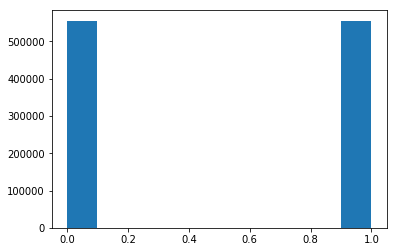

In [26]:
# Imbalance in E_Account
plt.hist(y_E_acc)
y_E_acc.shape

In [27]:
#XGBoost model 1 for E_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_E_acc, X_test_E_acc, y_train_E_acc, y_test_E_acc= train_test_split(X_E_acc,y_E_acc,test_size=test_size, random_state=seed)

# Train the XGboost model
model_E_acc = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=80)
model_E_acc.fit(X_train_E_acc, y_train_E_acc)
predictions_E_acc = model_E_acc.predict(X_test_E_acc)
pred_prob_E_acc = model_E_acc.predict_proba(X_test_E_acc)

# Check the accuracy
accuracy_E_acc = accuracy_score(y_test_E_acc, predictions_E_acc)
print("Accuracy: %.2f%%" % (accuracy_E_acc * 100.0))

Accuracy: 92.25%


In [28]:
# Log loss for E_Account
from sklearn.metrics import log_loss
log_loss(y_test_E_acc,pred_prob_E_acc)

0.18194013260754607

In [29]:
#Classification Report and confusion matrix - model 1 for E_Account
from sklearn.metrics import classification_report
print("classification_report for E_Account:")
print(classification_report(y_test_E_acc,predictions_E_acc))

from sklearn.metrics import confusion_matrix
M_E_ac=confusion_matrix(y_test_E_acc,predictions_E_acc)
print("Confusion matrix for model_xgboost_E_Acc:")
print(M_E_ac)

classification_report for E_Account:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92    183031
           1       0.92      0.93      0.92    183541

   micro avg       0.92      0.92      0.92    366572
   macro avg       0.92      0.92      0.92    366572
weighted avg       0.92      0.92      0.92    366572

Confusion matrix for model_xgboost_E_Acc:
[[167222  15809]
 [ 12597 170944]]


In [30]:
# Oversampling to decrease imbalance in product columns for Funds
from imblearn.over_sampling import SMOTE

X_Funds = train_data[features]
y_Funds = train_data['Funds']

sm = SMOTE()
X_Funds,y_Funds = sm.fit_sample(X_Funds, y_Funds )

(1202954,)

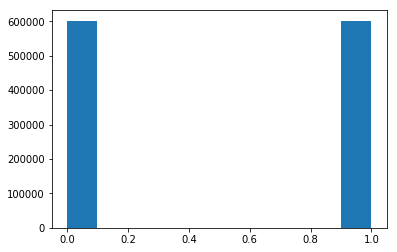

In [31]:
# Imbalance in Funds
plt.hist(y_Funds)
y_Funds.shape

In [32]:
#XGBoost model 1 for Funds
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Funds, X_test_Funds, y_train_Funds, y_test_Funds= train_test_split(X_Funds,y_Funds,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Funds = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model_Funds.fit(X_train_Funds, y_train_Funds)
predictions_Funds = model_Funds.predict(X_test_Funds)
pred_prob_Funds = model_Funds.predict_proba(X_test_Funds)

# Check the accuracy
accuracy_Funds = accuracy_score(y_test_Funds, predictions_Funds)
print("Accuracy: %.2f%%" % (accuracy_Funds * 100.0))

Accuracy: 98.16%


In [33]:
# Log loss for Funds
from sklearn.metrics import log_loss
log_loss(y_test_Funds,pred_prob_Funds)

0.05481324707844448

In [34]:
#Classification Report and confusion matrix - model 1 for Funds
from sklearn.metrics import classification_report
print("classification_report for Funds:")
print(classification_report(y_test_Funds,predictions_Funds))

from sklearn.metrics import confusion_matrix
M_Funds=confusion_matrix(y_test_Funds,predictions_Funds)
print("Confusion matrix for model_xgboost_Funds:")
print(M_Funds)

classification_report for Funds:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    198413
           1       0.98      0.98      0.98    198562

   micro avg       0.98      0.98      0.98    396975
   macro avg       0.98      0.98      0.98    396975
weighted avg       0.98      0.98      0.98    396975

Confusion matrix for model_xgboost_Funds:
[[194735   3678]
 [  3641 194921]]


In [35]:
# Oversampling to decrease imbalance in product columns for Mortgage
from imblearn.over_sampling import SMOTE

X_Mortgage = train_data[features]
y_Mortgage = train_data['Mortgage']

sm = SMOTE()
X_Mortgage,y_Mortgage = sm.fit_sample(X_Mortgage, y_Mortgage )

(1220436,)

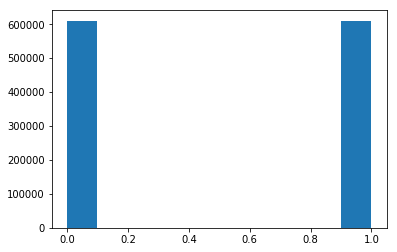

In [36]:
# Imbalance in Mortgage
plt.hist(y_Mortgage)
y_Mortgage.shape

In [37]:
#XGBoost model 1 for Mortgage
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Mortgage, X_test_Mortgage, y_train_Mortgage, y_test_Mortgage= train_test_split(X_Mortgage,y_Mortgage,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Mortgage = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model_Mortgage.fit(X_train_Mortgage, y_train_Mortgage)
predictions_Mortgage = model_Mortgage.predict(X_test_Mortgage)
pred_prob_Mortgage = model_Mortgage.predict_proba(X_test_Mortgage)

# Check the accuracy
accuracy_Mortgage = accuracy_score(y_test_Mortgage, predictions_Mortgage)
print("Accuracy: %.2f%%" % (accuracy_Mortgage * 100.0))

Accuracy: 99.18%


In [38]:
# Log loss for Mortgage
from sklearn.metrics import log_loss
log_loss(y_test_Mortgage,pred_prob_Mortgage)

0.0272671378437231

In [39]:
#Classification Report and confusion matrix - model 1 for Mortgage
from sklearn.metrics import classification_report
print("classification_report for Mortgage:")
print(classification_report(y_test_Mortgage,predictions_Mortgage))

from sklearn.metrics import confusion_matrix
M_Mortgage=confusion_matrix(y_test_Mortgage,predictions_Mortgage)
print("Confusion matrix for model_xgboost_Mortgage:")
print(M_Mortgage)

classification_report for Mortgage:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    201401
           1       0.99      0.99      0.99    201343

   micro avg       0.99      0.99      0.99    402744
   macro avg       0.99      0.99      0.99    402744
weighted avg       0.99      0.99      0.99    402744

Confusion matrix for model_xgboost_Mortgage:
[[199444   1957]
 [  1326 200017]]


In [40]:
# Oversampling to decrease imbalance in product columns for Pensions1
from imblearn.over_sampling import SMOTE

X_Pensions1 = train_data[features]
y_Pensions1 = train_data['Pensions1']

sm = SMOTE()
X_Pensions1,y_Pensions1 = sm.fit_sample(X_Pensions1, y_Pensions1)

(1144186,)

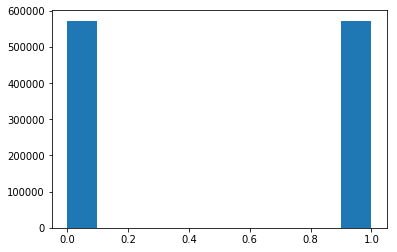

In [41]:
# Imbalance in Pensions1
plt.hist(y_Pensions1)
y_Pensions1.shape

In [42]:
#XGBoost model 1 for Pensions1
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Pensions1, X_test_Pensions1, y_train_Pensions1, y_test_Pensions1= train_test_split(X_Pensions1,y_Pensions1,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Pensions1 = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model_Pensions1.fit(X_train_Pensions1, y_train_Pensions1)
predictions_Pensions1 = model_Pensions1.predict(X_test_Pensions1)
pred_prob_Pensions1 = model_Pensions1.predict_proba(X_test_Pensions1)

# Check the accuracy
accuracy_Pensions1 = accuracy_score(y_test_Pensions1, predictions_Pensions1)
print("Accuracy: %.2f%%" % (accuracy_Pensions1 * 100.0))

Accuracy: 93.96%


In [43]:
# Log loss for Pensions1
from sklearn.metrics import log_loss
log_loss(y_test_Pensions1,pred_prob_Pensions1)

0.1508444655634928

In [44]:
#Classification Report and confusion matrix - model 1 for Pensions1
from sklearn.metrics import classification_report
print("classification_report for Pensions1:")
print(classification_report(y_test_Pensions1,predictions_Pensions1))

from sklearn.metrics import confusion_matrix
M_Pensions1=confusion_matrix(y_test_Pensions1,predictions_Pensions1)
print("Confusion matrix for model_xgboost_Pensions1:")
print(M_Pensions1)

classification_report for Pensions1:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    188537
         1.0       0.93      0.95      0.94    189045

   micro avg       0.94      0.94      0.94    377582
   macro avg       0.94      0.94      0.94    377582
weighted avg       0.94      0.94      0.94    377582

Confusion matrix for model_xgboost_Pensions1:
[[176091  12446]
 [ 10363 178682]]


In [6]:
# Oversampling to decrease imbalance in product columns for Pensions2
from imblearn.over_sampling import SMOTE

X_Pensions2 = train_data[features]
y_Pensions2 = train_data['Pensions2']

sm = SMOTE()
X_Pensions2,y_Pensions2 = sm.fit_sample(X_Pensions2, y_Pensions2)

(1144186,)

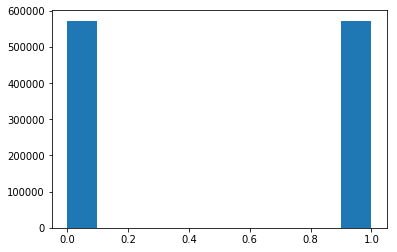

In [7]:
# Imbalance in pensions2
plt.hist(y_Pensions2)
y_Pensions2.shape

In [8]:
#XGBoost model 1 for Pensions2
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Pensions2, X_test_Pensions2, y_train_Pensions2, y_test_Pensions2= train_test_split(X_Pensions2,y_Pensions2,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Pensions2 = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model_Pensions2.fit(X_train_Pensions2, y_train_Pensions2)
predictions_Pensions2 = model_Pensions2.predict(X_test_Pensions2)
pred_prob_Pensions2 = model_Pensions2.predict_proba(X_test_Pensions2)

# Check the accuracy
accuracy_Pensions2 = accuracy_score(y_test_Pensions2, predictions_Pensions2)
print("Accuracy: %.2f%%" % (accuracy_Pensions2 * 100.0))

Accuracy: 93.90%


In [9]:
# Log loss for Pensions2
from sklearn.metrics import log_loss
log_loss(y_test_Pensions2,pred_prob_Pensions2)

0.15247524542447877

In [10]:
#Classification Report and confusion matrix - model 1 for Pensions2
from sklearn.metrics import classification_report
print("classification_report for Pensions2:")
print(classification_report(y_test_Pensions2,predictions_Pensions2))

from sklearn.metrics import confusion_matrix
M_Pensions2=confusion_matrix(y_test_Pensions2,predictions_Pensions2)
print("Confusion matrix for model_xgboost_Pensions2:")
print(M_Pensions2)

classification_report for Pensions2:
              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94    188537
         1.0       0.93      0.95      0.94    189045

   micro avg       0.94      0.94      0.94    377582
   macro avg       0.94      0.94      0.94    377582
weighted avg       0.94      0.94      0.94    377582

Confusion matrix for model_xgboost_Pensions2:
[[175824  12713]
 [ 10314 178731]]


In [11]:
# Oversampling to decrease imbalance in product columns for Loans
from imblearn.over_sampling import SMOTE

X_Loans = train_data[features]
y_Loans = train_data['Loans']

sm = SMOTE()
X_Loans,y_Loans = sm.fit_sample(X_Loans, y_Loans)

(1226182,)

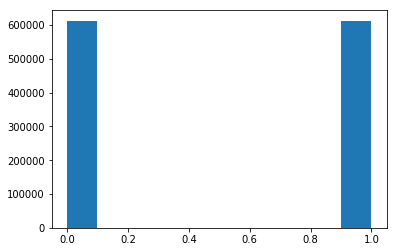

In [12]:
# Imbalance in Loans
plt.hist(y_Loans)
y_Loans.shape

In [13]:
#XGBoost model 1 for Loans
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Loans, X_test_Loans, y_train_Loans, y_test_Loans= train_test_split(X_Loans,y_Loans,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Loans = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_Loans.fit(X_train_Loans, y_train_Loans)
predictions_Loans = model_Loans.predict(X_test_Loans)
pred_prob_Loans = model_Loans.predict_proba(X_test_Loans)

# Check the accuracy
accuracy_Loans = accuracy_score(y_test_Loans, predictions_Loans)
print("Accuracy: %.2f%%" % (accuracy_Loans * 100.0))

Accuracy: 99.45%


In [14]:
# Log loss for Loans
from sklearn.metrics import log_loss
log_loss(y_test_Loans,pred_prob_Loans)

0.016247711083315932

In [15]:
#Classification Report and confusion matrix - model 1 for Loans
from sklearn.metrics import classification_report
print("classification_report for Loans:")
print(classification_report(y_test_Loans,predictions_Loans))

from sklearn.metrics import confusion_matrix
M_Loans=confusion_matrix(y_test_Loans,predictions_Loans)
print("Confusion matrix for model_xgboost_Loans:")
print(M_Loans)

classification_report for Loans:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    202325
           1       1.00      0.99      0.99    202316

   micro avg       0.99      0.99      0.99    404641
   macro avg       0.99      0.99      0.99    404641
weighted avg       0.99      0.99      0.99    404641

Confusion matrix for model_xgboost_Loans:
[[201547    778]
 [  1464 200852]]


In [16]:
# Oversampling to decrease imbalance in product columns for Taxes
from imblearn.over_sampling import SMOTE

X_Taxes = train_data[features]
y_Taxes = train_data['Taxes']

sm = SMOTE()
X_Taxes,y_Taxes = sm.fit_sample(X_Taxes, y_Taxes)

(1157018,)

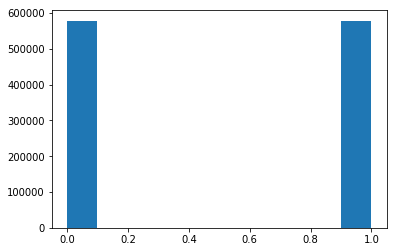

In [17]:
# Imbalance in Taxes
plt.hist(y_Taxes)
y_Taxes.shape

In [18]:
#XGBoost model 1 for Taxes
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Taxes, X_test_Taxes, y_train_Taxes, y_test_Taxes= train_test_split(X_Taxes,y_Taxes,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Taxes = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=90)
model_Taxes.fit(X_train_Taxes, y_train_Taxes)
predictions_Taxes = model_Taxes.predict(X_test_Taxes)
pred_prob_Taxes = model_Taxes.predict_proba(X_test_Taxes)

# Check the accuracy
accuracy_Taxes = accuracy_score(y_test_Taxes, predictions_Taxes)
print("Accuracy: %.2f%%" % (accuracy_Taxes * 100.0))

Accuracy: 94.62%


In [19]:
# Log loss for Taxes
from sklearn.metrics import log_loss
log_loss(y_test_Taxes,pred_prob_Taxes)

0.14028868795544852

In [20]:
#Classification Report and confusion matrix - model 1 for Taxes
from sklearn.metrics import classification_report
print("classification_report for Taxes:")
print(classification_report(y_test_Taxes,predictions_Taxes))

from sklearn.metrics import confusion_matrix
M_Taxes=confusion_matrix(y_test_Taxes,predictions_Taxes)
print("Confusion matrix for model_xgboost_Taxes:")
print(M_Taxes)

classification_report for Taxes:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95    191089
           1       0.94      0.95      0.95    190727

   micro avg       0.95      0.95      0.95    381816
   macro avg       0.95      0.95      0.95    381816
weighted avg       0.95      0.95      0.95    381816

Confusion matrix for model_xgboost_Taxes:
[[180443  10646]
 [  9908 180819]]


In [21]:
# Oversampling to decrease imbalance in product columns for Guarantees
from imblearn.over_sampling import SMOTE

X_Guarantees = train_data[features]
y_Guarantees = train_data['Guarantees']

sm = SMOTE()
X_Guarantees,y_Guarantees = sm.fit_sample(X_Guarantees, y_Guarantees)

(1157018,)

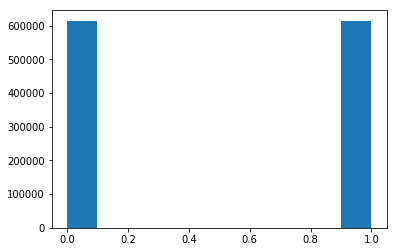

In [22]:
# Imbalance in Guarantees
plt.hist(y_Guarantees)
y_Taxes.shape

In [23]:
#XGBoost model 1 for Guarantees
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Guarantees, X_test_Guarantees, y_train_Guarantees, y_test_Guarantees= train_test_split(X_Guarantees,y_Guarantees,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Guarantees = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_Guarantees.fit(X_train_Guarantees, y_train_Guarantees)
predictions_Guarantees = model_Guarantees.predict(X_test_Guarantees)
pred_prob_Guarantees = model_Guarantees.predict_proba(X_test_Guarantees)

# Check the accuracy
accuracy_Guarantees = accuracy_score(y_test_Guarantees, predictions_Guarantees)
print("Accuracy: %.2f%%" % (accuracy_Guarantees * 100.0))

Accuracy: 99.98%


In [24]:
# Log loss for Guarantees
from sklearn.metrics import log_loss
log_loss(y_test_Guarantees,pred_prob_Guarantees)

0.001327021176154001

In [25]:
#Classification Report and confusion matrix - model 1 for Guarantees
from sklearn.metrics import classification_report
print("classification_report for Guarantees:")
print(classification_report(y_test_Guarantees,predictions_Guarantees))

from sklearn.metrics import confusion_matrix
M_Guarantees=confusion_matrix(y_test_Guarantees,predictions_Guarantees)
print("Confusion matrix for model_xgboost_Guarantees:")
print(M_Guarantees)

classification_report for Guarantees:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203127
           1       1.00      1.00      1.00    202867

   micro avg       1.00      1.00      1.00    405994
   macro avg       1.00      1.00      1.00    405994
weighted avg       1.00      1.00      1.00    405994

Confusion matrix for model_xgboost_Guarantees:
[[203066     61]
 [    15 202852]]


In [26]:
# Oversampling to decrease imbalance in product columns for Credit_card
from imblearn.over_sampling import SMOTE

X_Credit_card= train_data[features]
y_Credit_card = train_data['Credit_card']

sm = SMOTE()
X_Credit_card,y_Credit_card = sm.fit_sample(X_Credit_card, y_Credit_card)

(1159744,)

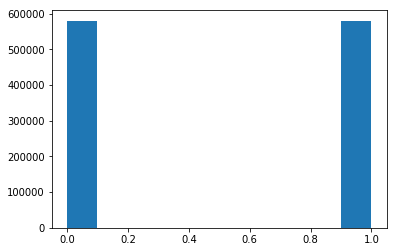

In [27]:
# Imbalance in Credit_card
plt.hist(y_Credit_card)
y_Credit_card.shape

In [28]:
#XGBoost model 1 for credit card
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Credit_card, X_test_Credit_card, y_train_Credit_card, y_test_Credit_card= train_test_split(X_Credit_card,y_Credit_card,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Credit_card = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_Credit_card.fit(X_train_Credit_card, y_train_Credit_card)
predictions_Credit_card = model_Credit_card.predict(X_test_Credit_card)
pred_prob_Credit_card = model_Credit_card.predict_proba(X_test_Credit_card)

# Check the accuracy
accuracy_Credit_card = accuracy_score(y_test_Credit_card, predictions_Credit_card)
print("Accuracy: %.2f%%" % (accuracy_Credit_card * 100.0))

Accuracy: 94.86%


In [29]:
# Log loss for Credit_card
from sklearn.metrics import log_loss
log_loss(y_test_Credit_card,pred_prob_Credit_card)

0.13537564468266283

In [30]:
#Classification Report and confusion matrix - model 1 for Credit_card
from sklearn.metrics import classification_report
print("classification_report for Credit_card:")
print(classification_report(y_test_Credit_card,predictions_Credit_card))

from sklearn.metrics import confusion_matrix
M_Credit_card=confusion_matrix(y_test_Credit_card,predictions_Credit_card)
print("Confusion matrix for model_xgboost_Credit_card:")
print(M_Credit_card)

classification_report for Credit_card:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95    191188
           1       0.94      0.96      0.95    191528

   micro avg       0.95      0.95      0.95    382716
   macro avg       0.95      0.95      0.95    382716
weighted avg       0.95      0.95      0.95    382716

Confusion matrix for model_xgboost_Credit_card:
[[179650  11538]
 [  8134 183394]]


In [31]:
# Oversampling to decrease imbalance in product columns for Securities
from imblearn.over_sampling import SMOTE

X_Securities= train_data[features]
y_Securities = train_data['Securities']

sm = SMOTE()
X_Securities,y_Securities = sm.fit_sample(X_Securities, y_Securities)

(1190264,)

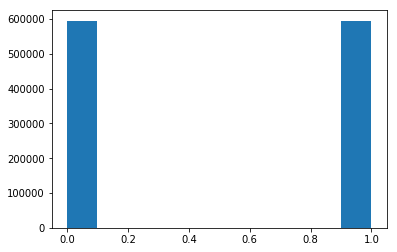

In [32]:
# Imbalance in Securities
plt.hist(y_Securities)
y_Securities.shape

In [33]:
#XGBoost model 1 for Securities
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Securities, X_test_Securities, y_train_Securities, y_test_Securities= train_test_split(X_Securities,y_Securities,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Securities = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_Securities.fit(X_train_Securities, y_train_Securities)
predictions_Securities = model_Securities.predict(X_test_Securities)
pred_prob_Securities = model_Securities.predict_proba(X_test_Securities)

# Check the accuracy
accuracy_Securities = accuracy_score(y_test_Securities, predictions_Securities)
print("Accuracy: %.2f%%" % (accuracy_Securities * 100.0))

Accuracy: 97.05%


In [34]:
# Log loss for Securities
from sklearn.metrics import log_loss
log_loss(y_test_Securities,pred_prob_Securities)

0.08704161824821767

In [35]:
#Classification Report and confusion matrix - model 1 for Securities
from sklearn.metrics import classification_report
print("classification_report for Securities:")
print(classification_report(y_test_Securities,predictions_Securities))

from sklearn.metrics import confusion_matrix
M_Securities=confusion_matrix(y_test_Securities,predictions_Securities)
print("Confusion matrix for model_xgboost_Securities:")
print(M_Securities)

classification_report for Securities:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97    196377
           1       0.97      0.97      0.97    196411

   micro avg       0.97      0.97      0.97    392788
   macro avg       0.97      0.97      0.97    392788
weighted avg       0.97      0.97      0.97    392788

Confusion matrix for model_xgboost_Securities:
[[190073   6304]
 [  5265 191146]]


In [36]:
# Oversampling to decrease imbalance in product columns for Home_Account
from imblearn.over_sampling import SMOTE

X_Home_Account= train_data[features]
y_Home_Account = train_data['Home_Account']

sm = SMOTE()
X_Home_Account,y_Home_Account = sm.fit_sample(X_Home_Account, y_Home_Account)

(1223928,)

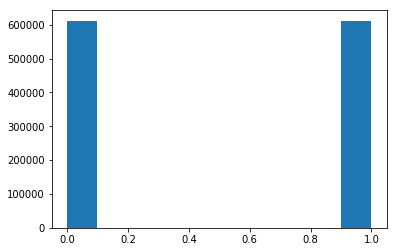

In [37]:
# Imbalance in Securities
plt.hist(y_Home_Account)
y_Home_Account.shape

In [38]:
#XGBoost model 1 for Home_Account
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Home_Account, X_test_Home_Account, y_train_Home_Account, y_test_Home_Account= train_test_split(X_Home_Account,y_Home_Account,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Home_Account = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_Home_Account.fit(X_train_Home_Account, y_train_Home_Account)
predictions_Home_Account = model_Home_Account.predict(X_test_Home_Account)
pred_prob_Home_Account = model_Home_Account.predict_proba(X_test_Home_Account)

# Check the accuracy
accuracy_Home_Account = accuracy_score(y_test_Home_Account, predictions_Home_Account)
print("Accuracy: %.2f%%" % (accuracy_Home_Account * 100.0))

Accuracy: 99.19%


In [39]:
# Log loss for Home_Account
from sklearn.metrics import log_loss
log_loss(y_test_Home_Account,pred_prob_Home_Account)

0.026957472379675308

In [40]:
#Classification Report and confusion matrix - model 1 for Home_Account
from sklearn.metrics import classification_report
print("classification_report for Home_Account:")
print(classification_report(y_test_Home_Account,predictions_Home_Account))

from sklearn.metrics import confusion_matrix
M_Home_Account=confusion_matrix(y_test_Home_Account,predictions_Home_Account)
print("Confusion matrix for model_xgboost_Home_Account:")
print(M_Home_Account)

classification_report for Home_Account:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    202129
           1       0.99      0.99      0.99    201768

   micro avg       0.99      0.99      0.99    403897
   macro avg       0.99      0.99      0.99    403897
weighted avg       0.99      0.99      0.99    403897

Confusion matrix for model_xgboost_Home_Account:
[[200693   1436]
 [  1816 199952]]


In [5]:
# Oversampling to decrease imbalance in product columns for Direct_Debit
from imblearn.over_sampling import SMOTE

X_Direct_Debit= train_data[features]
y_Direct_Debit = train_data['Direct_Debit']

sm = SMOTE()
X_Direct_Debit,y_Direct_Debit = sm.fit_sample(X_Direct_Debit, y_Direct_Debit)

(1040440,)

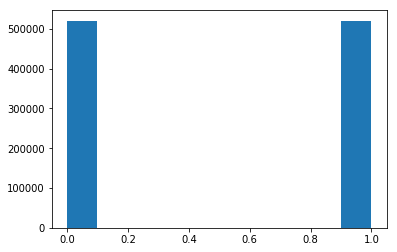

In [6]:
# Imbalance in Direct_Debit
plt.hist(y_Direct_Debit)
y_Direct_Debit.shape

In [7]:
#XGBoost model 1 for Direct_Debit
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_Direct_Debit, X_test_Direct_Debit, y_train_Direct_Debit, y_test_Direct_Debit= train_test_split(X_Direct_Debit,y_Direct_Debit,test_size=test_size, random_state=seed)

# Train the XGboost model
model_Direct_Debit = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=70,n_estimators=70)
model_Direct_Debit.fit(X_train_Direct_Debit, y_train_Direct_Debit)
predictions_Direct_Debit = model_Direct_Debit.predict(X_test_Direct_Debit)
pred_prob_Direct_Debit = model_Direct_Debit.predict_proba(X_test_Direct_Debit)

# Check the accuracy
accuracy_Direct_Debit = accuracy_score(y_test_Direct_Debit, predictions_Direct_Debit)
print("Accuracy: %.2f%%" % (accuracy_Direct_Debit * 100.0))

Accuracy: 88.97%


In [8]:
# Log loss for Direct_Debit
from sklearn.metrics import log_loss
log_loss(y_test_Direct_Debit,pred_prob_Direct_Debit)

0.2416332337258135

In [45]:
#Classification Report and confusion matrix - model 1 for Direct_Debit
from sklearn.metrics import classification_report
print("classification_report for Home_Account:")
print(classification_report(y_test_Direct_Debit,predictions_Direct_Debit))

from sklearn.metrics import confusion_matrix
M_Direct_Debit=confusion_matrix(y_test_Direct_Debit,predictions_Direct_Debit)
print("Confusion matrix for model_xgboost_Direct_Debit:")
print(M_Direct_Debit)

classification_report for Home_Account:
              precision    recall  f1-score   support

           0       0.91      0.87      0.89    171495
           1       0.87      0.91      0.89    171851

   micro avg       0.89      0.89      0.89    343346
   macro avg       0.89      0.89      0.89    343346
weighted avg       0.89      0.89      0.89    343346

Confusion matrix for model_xgboost_Direct_Debit:
[[148977  22518]
 [ 15369 156482]]


In [11]:
# Oversampling to decrease imbalance in product columns for payroll
from imblearn.over_sampling import SMOTE

X_payroll= train_data[features]
y_payroll = train_data['Payroll']

sm = SMOTE()
X_payroll,y_payroll = sm.fit_sample(X_payroll, y_payroll)

(1152816,)

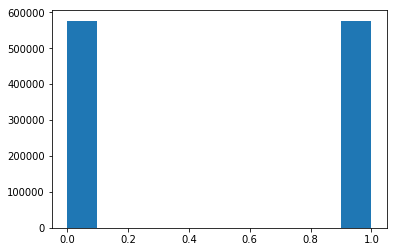

In [12]:
# Imbalance in Direct_Debit
plt.hist(y_payroll)
y_payroll.shape

In [13]:
#XGBoost model 1 for Payroll
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Training and testing datasplits
seed = 100
test_size = 0.33
X_train_payroll, X_test_payroll, y_train_payroll, y_test_payroll = train_test_split(X_payroll,y_payroll,test_size=test_size, random_state=seed)

# Train the XGboost model
model_payroll = XGBClassifier(n_jobs=-1,gamma=2,learning_rate=0.1,max_depth=60,n_estimators=70)
model_payroll.fit(X_train_payroll, y_train_payroll)
predictions_payroll = model_payroll.predict(X_test_payroll)
pred_prob_payroll = model_payroll.predict_proba(X_test_payroll)

# Check the accuracy
accuracy_payroll = accuracy_score(y_test_payroll, predictions_payroll)
print("Accuracy: %.2f%%" % (accuracy_payroll * 100.0))

Accuracy: 94.05%


In [14]:
# Log loss for Payroll
from sklearn.metrics import log_loss
log_loss(y_test_payroll,pred_prob_payroll)

0.15160240247616213

In [15]:
#Classification Report and confusion matrix - model 1 for Payroll
from sklearn.metrics import classification_report
print("classification_report for Home_Account:")
print(classification_report(y_test_payroll,predictions_payroll))

from sklearn.metrics import confusion_matrix
M_payroll=confusion_matrix(y_test_payroll,predictions_payroll)
print("Confusion matrix for model_xgboost_Direct_Debit:")
print(M_payroll)

classification_report for Home_Account:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94    190042
         1.0       0.93      0.95      0.94    190388

   micro avg       0.94      0.94      0.94    380430
   macro avg       0.94      0.94      0.94    380430
weighted avg       0.94      0.94      0.94    380430

Confusion matrix for model_xgboost_Direct_Debit:
[[176423  13619]
 [  9013 181375]]


In [13]:
# cust_info is a pandas series having the required features
product_purchase_probs = []
models = []

#models.extend([model_saving,model_curr_acc,model_deri_acc,model_pay_acc,model_juni_acc,model_MPA_acc,model_PA_acc,model_PPA_acc,model_STD_acc,model_MTD_acc,model_LTD_acc,model_E_acc,model_Funds,model_Mortgage,model_Pensions1,model_Pensions2,model_Loans,model_Taxes,model_Guarantees,model_Credit_card,model_Securities,model_Home_Account,model_Direct_Debit,model_payroll])
models.extend([model_saving,model_curr_acc,model_deri_acc,model_pay_acc,model_juni_acc,model_MPA_acc,model_PA_acc,model_PPA_acc])
cust_info=train_data.loc[train_data["Customer_Code"]==1050611]

for model in models:
    product_purchase_probs.append(model.predict_proba(cust_info))
print(product_purchase_probs)


NameError: name 'model_saving' is not defined

In [3]:
train_data.head(5)

,Date,Date_Acc_Open,Customer_Code,Age,Customer_Seniority,Household_Income,New_customer_index,Activity_Index_0.0,Activity_Index_1.0,Customer_Relation_Type_Beginning_Month_A,...,Mortgage,Pensions1,Loans,Taxes,Credit_card,Securities,Home_Account,Payroll,Pensions2,Direct_Debit
0,2015-01-28,2015-01-12,1375586,0.289474,0.000000,0.002977,0.0,0,1,1,...,0,0.0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,2012-08-10,1050611,0.184211,0.142276,0.001189,0.0,1,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,2012-08-10,1050612,0.184211,0.142276,0.004187,0.0,1,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,2012-08-10,1050613,0.175439,0.142276,0.004104,0.0,1,0,0,...,0,0.0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,2012-08-10,1050614,0.184211,0.142276,0.003860,0.0,0,1,1,...,0,0.0,0,0,0,0,0,0.0,0.0,0
